In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, DotProduct, ConstantKernel as C
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
#import creep data
creep_df = pd.read_csv('../Data/SS316_dataset.csv')
creep_df


,Material,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,Ti,Al,B,N,Nb+Ta,Elongation,Reduction of Area,Stress,Temperature,creep_rupture_life
0,0.0,0.060,0.59,1.69,0.024,0.017,13.32,16.73,2.38,0.07,0.0110,0.015,0.0010,0.0300,0.020,55.0,61,235,650,29.2
1,1.0,0.050,0.52,1.51,0.021,0.010,13.21,16.42,2.34,0.14,0.0110,0.018,0.0005,0.0340,0.010,68.0,78,157,700,34.5
2,7.0,0.060,0.52,1.60,0.025,0.007,13.30,16.70,2.25,0.24,0.0600,0.020,0.0008,0.0318,0.010,72.0,77,235,650,38.8
3,18.0,0.012,0.56,0.81,0.024,0.004,10.67,16.39,2.11,0.27,0.0006,0.011,0.0010,0.0810,0.001,106.0,80,177,700,39.0
4,8.0,0.060,0.52,1.58,0.025,0.007,13.60,16.60,2.31,0.26,0.0290,0.021,0.0007,0.0224,0.010,75.0,83,157,700,40.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,7.0,0.060,0.52,1.60,0.025,0.007,13.30,16.70,2.25,0.24,0.0600,0.020,0.0008,0.0318,0.010,41.0,55,118,600,142185.9
613,6.0,0.070,0.61,1.65,0.025,0.007,13.60,16.60,2.33,0.26,0.0430,0.017,0.0011,0.0250,0.010,26.0,39,108,600,152758.0
614,2.0,0.050,0.71,1.52,0.022,0.013,13.50,17.50,2.28,0.17,0.0550,0.027,0.0013,0.0350,0.020,28.0,37,108,600,173814.3
615,6.0,0.070,0.61,1.65,0.025,0.007,13.60,16.60,2.33,0.26,0.0430,0.017,0.0011,0.0250,0.010,25.0,23,41,700,178190.4


In [3]:
Log_Creep_Life = np.log10(creep_df['creep_rupture_life'])
creep_df['Log_Creep_Life'] = Log_Creep_Life
creep_df = creep_df.drop(columns = ['creep_rupture_life'])

In [4]:
creep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Material           617 non-null    float64
 1   C                  617 non-null    float64
 2   Si                 617 non-null    float64
 3   Mn                 617 non-null    float64
 4   P                  617 non-null    float64
 5   S                  617 non-null    float64
 6   Ni                 617 non-null    float64
 7   Cr                 617 non-null    float64
 8   Mo                 617 non-null    float64
 9   Cu                 617 non-null    float64
 10  Ti                 617 non-null    float64
 11  Al                 617 non-null    float64
 12  B                  617 non-null    float64
 13  N                  617 non-null    float64
 14  Nb+Ta              617 non-null    float64
 15  Elongation         617 non-null    float64
 16  Reduction of Area  617 non

In [5]:
creep_df.isnull().sum()

Material             0
C                    0
Si                   0
Mn                   0
P                    0
S                    0
Ni                   0
Cr                   0
Mo                   0
Cu                   0
Ti                   0
Al                   0
B                    0
N                    0
Nb+Ta                0
Elongation           0
Reduction of Area    0
Stress               0
Temperature          0
Log_Creep_Life       0
dtype: int64

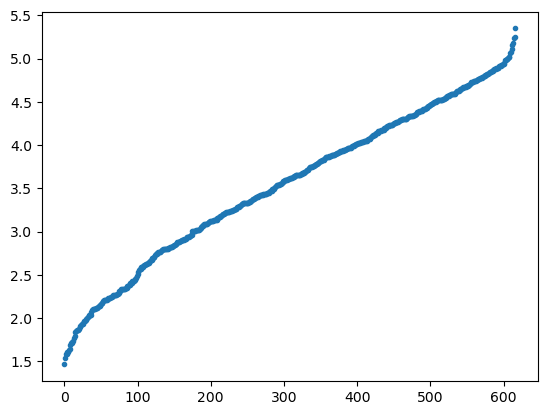

In [6]:
plt.plot(creep_df['Log_Creep_Life'], '.')

In [7]:
features = creep_df.iloc[:, 0:19]
targets = creep_df.iloc[:, 19]
features

,Material,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,Ti,Al,B,N,Nb+Ta,Elongation,Reduction of Area,Stress,Temperature
0,0.0,0.060,0.59,1.69,0.024,0.017,13.32,16.73,2.38,0.07,0.0110,0.015,0.0010,0.0300,0.020,55.0,61,235,650
1,1.0,0.050,0.52,1.51,0.021,0.010,13.21,16.42,2.34,0.14,0.0110,0.018,0.0005,0.0340,0.010,68.0,78,157,700
2,7.0,0.060,0.52,1.60,0.025,0.007,13.30,16.70,2.25,0.24,0.0600,0.020,0.0008,0.0318,0.010,72.0,77,235,650
3,18.0,0.012,0.56,0.81,0.024,0.004,10.67,16.39,2.11,0.27,0.0006,0.011,0.0010,0.0810,0.001,106.0,80,177,700
4,8.0,0.060,0.52,1.58,0.025,0.007,13.60,16.60,2.31,0.26,0.0290,0.021,0.0007,0.0224,0.010,75.0,83,157,700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,7.0,0.060,0.52,1.60,0.025,0.007,13.30,16.70,2.25,0.24,0.0600,0.020,0.0008,0.0318,0.010,41.0,55,118,600
613,6.0,0.070,0.61,1.65,0.025,0.007,13.60,16.60,2.33,0.26,0.0430,0.017,0.0011,0.0250,0.010,26.0,39,108,600
614,2.0,0.050,0.71,1.52,0.022,0.013,13.50,17.50,2.28,0.17,0.0550,0.027,0.0013,0.0350,0.020,28.0,37,108,600
615,6.0,0.070,0.61,1.65,0.025,0.007,13.60,16.60,2.33,0.26,0.0430,0.017,0.0011,0.0250,0.010,25.0,23,41,700


In [8]:
def coverage(y, yL, yH):
    return np.sum(100 / y.shape[0] * ((y>yL)&(y<yH)))

Run # 1 Fold # 1


c:\Users\L\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Pearson CC: 0.9935663159143144
R2 score: 0.9870750933778993
RMSE: 0.10130997672938157
MAE: 0.07476779359825829
Coverage: 95.9677419354839
Median Interval Width: 0.3525121626251795
Composite Metric: 1.4289534526645404


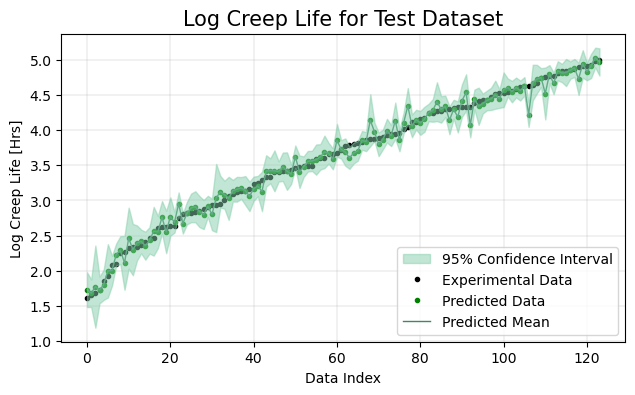

********************
Run # 1 Fold # 2
Pearson CC: 0.9944737141845874
R2 score: 0.9889038678252667
RMSE: 0.09770467297069846
MAE: 0.06948633229170663
Coverage: 89.51612903225808
Median Interval Width: 0.3299434344969474
Composite Metric: 1.429076604107047


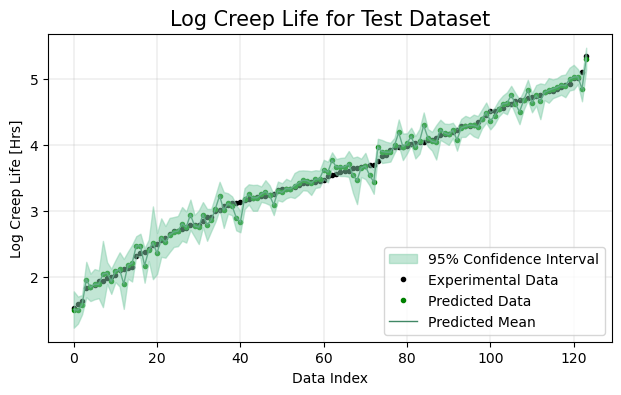

********************
Run # 1 Fold # 3


c:\Users\L\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Pearson CC: 0.992635127006095
R2 score: 0.9850264535759239
RMSE: 0.11494058747444116
MAE: 0.07778577137251734
Coverage: 94.30894308943085
Median Interval Width: 0.3646587103836154
Composite Metric: 1.3928896178029544


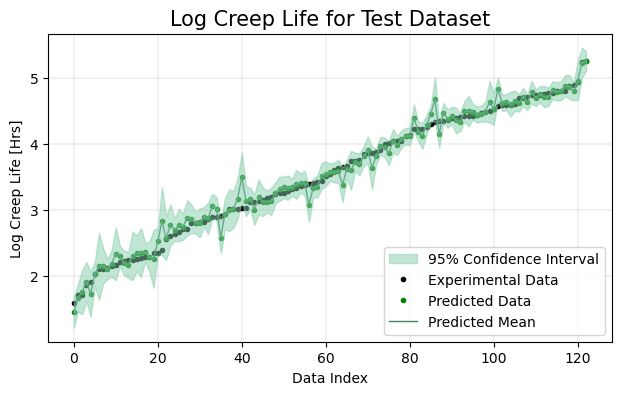

********************
Run # 1 Fold # 4


c:\Users\L\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Pearson CC: 0.9927687418950886
R2 score: 0.9855255525981214
RMSE: 0.10374926931308621
MAE: 0.07061260632182126
Coverage: 95.12195121951216
Median Interval Width: 0.3420719087160369
Composite Metric: 1.4442551201084077


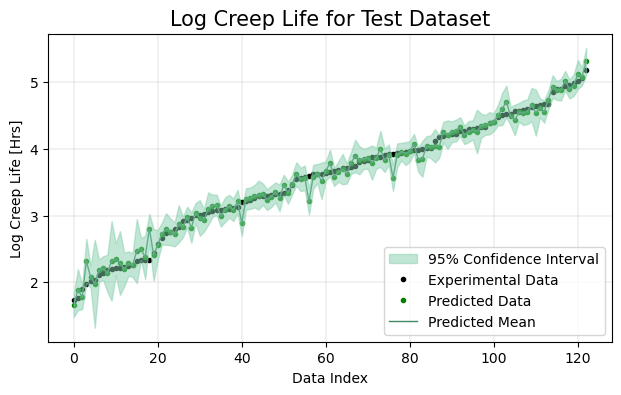

********************
Run # 1 Fold # 5


c:\Users\L\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
c:\Users\L\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Pearson CC: 0.9942330977209842
R2 score: 0.9884914250916988
RMSE: 0.09432031711614171
MAE: 0.06876232388641211
Coverage: 96.74796747967476
Median Interval Width: 0.33126049469198593
Composite Metric: 1.4803028269765863


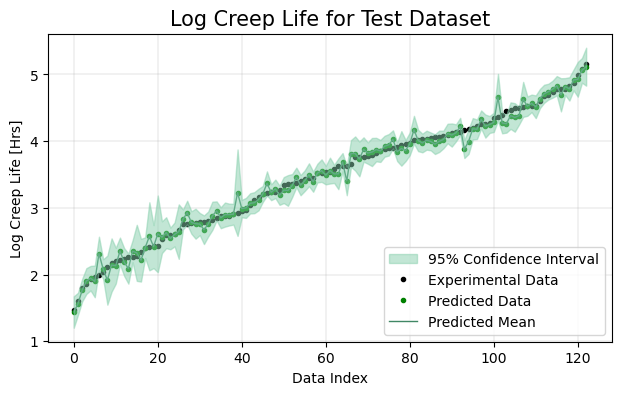

********************


In [9]:
# Evaluate multiple runs of the model
nruns = 1

nfolds = 5

PearsonCC = np.zeros((nruns, nfolds))
R2_score = np.zeros_like(PearsonCC)
RMSE = np.zeros_like(PearsonCC)
MAE = np.zeros_like(PearsonCC)
MAPE = np.zeros_like(PearsonCC)

test_coverage = np.zeros_like(PearsonCC)
upper_coverage = np.zeros_like(PearsonCC)
lower_coverage = np.zeros_like(PearsonCC)
mean_interval_width = np.zeros_like(PearsonCC)
median_interval_width = np.zeros_like(PearsonCC)
composite_metric = np.zeros_like(PearsonCC)

for j in range(nruns):

        kf = KFold(n_splits=nfolds, shuffle=True, random_state=50+j)

        kernel = C(1.0) * Matern(length_scale=1.0) + WhiteKernel(noise_level=1.0) + C(1.0) * DotProduct(sigma_0=1.0)

        for i, (tr, ts) in enumerate(kf.split(targets)):

            # Display the run number
            print('Run #', j+1, "Fold #", i+1)

            X_train, X_test = features.iloc[tr], features.iloc[ts]
            y_train, y_test = targets[tr], targets[ts]

            scale = MinMaxScaler()
            X_train = scale.fit_transform(X_train)
            X_test = scale.transform(X_test)

            model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=8, normalize_y=True)

            model.fit(X_train, y_train)

            mu_z, std_z = model.predict(X_test, return_std=True)
            y_pred_test = mu_z
            y_pred_unc_test = std_z

            PearsonCC[j, i] = pearsonr(y_test, y_pred_test)[0]
            R2_score[j, i] = r2_score(y_test, y_pred_test)
            RMSE[j, i] = sqrt(mean_squared_error(y_pred_test, y_test))
            MAE[j, i] = np.mean(abs(y_pred_test-y_test))

            df_test_low = y_pred_test - 2 * y_pred_unc_test
            df_test_median = y_pred_test
            df_test_high = y_pred_test + 2 * y_pred_unc_test

            test_coverage[j, i] = coverage(y_test, df_test_low, df_test_high)


            print(f'Pearson CC: {PearsonCC[j, i]}')
            print(f'R2 score: {R2_score[j, i]}')
            print(f'RMSE: {RMSE[j, i]}')
            print(f'MAE: {MAE[j, i]}')
            print(f'Coverage: {test_coverage[j, i]}')

            
            # Prediction interval width
            # Quantifies the average width of the prediction intervals. Smaller widths suggest more precise uncertainty estimates.

            median_interval_width[j, i] = np.median(df_test_high - df_test_low)
            print(f'Median Interval Width: {median_interval_width[j, i]}')

            # Composite metric that combines the coverage and the invers of interval width
            composite_metric[j, i] = 0.75*test_coverage[j, i]/100 + 0.25*(1/median_interval_width[j, i])
            print(f'Composite Metric: {composite_metric[j, i]}')

            fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
            iteration_list = [i for i in range(len(y_test))]
                        ## Uncertainty quantification plot
            y_pred = y_pred_test
            y_std = y_pred_unc_test
            ax[0].fill_between(iteration_list, y_pred - 2*y_std, y_pred + 2*y_std, alpha=0.5, color='#86cfac', zorder=5, label='95% Confidence Interval')
            ax[0].plot(iteration_list, y_test, 'ko', markersize=3, label="Experimental Data")
            ax[0].plot(iteration_list, y_pred, 'go', markersize=3, label="Predicted Data")
            ax[0].plot(iteration_list, y_pred, '-', linewidth=1, color="#408765", label="Predicted Mean")
            ax[0].legend(loc=4, fontsize=10, frameon=True)
            ax[0].set_xlabel("Data Index", fontsize=10)
            ax[0].set_ylabel("Log Creep Life [Hrs]", fontsize=10)
            ax[0].set_title("Log Creep Life for Test Dataset", fontsize=15)
            ax[0].grid(True, which='major', linestyle='-', linewidth='0.25')
            fig.delaxes(ax[1])
            plt.show()
            print(20*'*')

In [10]:
# Data frame
df1 = pd.DataFrame({'Pearson CC': PearsonCC.flatten(), 'R2 Score': R2_score.flatten(), 'RMSE': RMSE.flatten(),
                    'MAE': MAE.flatten(), 'Coverage': test_coverage.flatten()},index=None)
df1

,Pearson CC,R2 Score,RMSE,MAE,Coverage
0,0.993566,0.987075,0.101310,0.074768,95.967742
1,0.994474,0.988904,0.097705,0.069486,89.516129
2,0.992635,0.985026,0.114941,0.077786,94.308943
3,0.992769,0.985526,0.103749,0.070613,95.121951
4,0.994233,0.988491,0.094320,0.068762,96.747967


In [11]:
# Calculate mean values and standard deviations of the scores
PearsonCC_mean = np.mean(PearsonCC)
R2_score_mean = np.mean(R2_score)
RMSE_mean = np.mean(RMSE)
MAE_mean = np.mean(MAE)
test_coverage_mean = np.mean(test_coverage)

PearsonCC_std = np.std(PearsonCC)
R2_score_std = np.std(R2_score)
RMSE_std = np.std(RMSE)
MAE_std = np.std(MAE)
test_coverage_std = np.std(test_coverage)

# Data frame
df2 = pd.DataFrame({'Pearson CC Mean': PearsonCC_mean, 'Pearson CC Std': PearsonCC_std, 'R2 Score Mean': R2_score_mean, 'R2 Score Std': R2_score_std,
                  'RMSE Mean': RMSE_mean, 'RMSE Std': RMSE_std, 'MAE Mean': MAE_mean, 'MAE Std':MAE_std,
                   'RMSE Std': RMSE_std, 'Test Coverage Mean': test_coverage_mean, 'Test Coverage Std':test_coverage_std},index=[0])
df2

,Pearson CC Mean,Pearson CC Std,R2 Score Mean,R2 Score Std,RMSE Mean,RMSE Std,MAE Mean,MAE Std,Test Coverage Mean,Test Coverage Std
0,0.993535,0.000744,0.987004,0.001544,0.102405,0.007037,0.072283,0.003449,94.332547,2.542822


In [12]:
# Data frame
df3 = pd.DataFrame({'Coverage': test_coverage.flatten(), 'Interval Width': median_interval_width.flatten(), 'Composite Metric': composite_metric.flatten()},index=None)
df3

,Coverage,Interval Width,Composite Metric
0,95.967742,0.352512,1.428953
1,89.516129,0.329943,1.429077
2,94.308943,0.364659,1.392890
3,95.121951,0.342072,1.444255
4,96.747967,0.331260,1.480303


In [13]:
# Calculate mean values and standard deviations of the scores
test_coverage_mean = np.mean(test_coverage)

median_interval_width_mean = np.mean(median_interval_width)
composite_metric_mean = np.mean(composite_metric)

test_coverage_std = np.std(test_coverage)

median_interval_width_std = np.std(median_interval_width)
composite_metric_std = np.std(composite_metric)

# Data frame
df4 = pd.DataFrame({'Coverage Mean': test_coverage_mean, 'Coverage Std': test_coverage_std,
                    'Interval Width Mean': median_interval_width_mean, 'Interval Width Std':median_interval_width_std,
                   'Composite Metric Mean': composite_metric_mean, 'Composite Metric Std': composite_metric_std,},index=[0])
df4

,Coverage Mean,Coverage Std,Interval Width Mean,Interval Width Std,Composite Metric Mean,Composite Metric Std
0,94.332547,2.542822,0.344089,0.013136,1.435096,0.028224
